# **Convolutional Neural Network**

#### **Student Name:** Daniel Giedraitis 

#### **Student Number:** C00260331

#### **Module:** Data Science and Machine Learning 2 - Y4

In this notebook, I will build a Convolutional Neural Network (CNN) model using TensorFlow to recognize handwritten digits. A CNN is a deep learning algorithm capable of taking an input image, assigning importance (learnable weights and biases) to various aspects/objects in the image, and differentiating one from the other.

The purpose of this notebook is to gain a significant theoretical and practical understanding of the workings of the underlying machine learning algorithm, specifically CNNs. I will make significant adjustments, alterations, and additions to the notebook to achieve this goal. The adjustments will be aimed at improving my understanding of CNNs and their practical implications, such as changes in accuracy measures for the algorithm.

## **Change Log:**

### **Change 1:**
Increase the number of epochs from 10 to 20.

#### **Results:**
**10 Epochs:**
- Training Accuracy: 99.48%
- Training Loss: 0.0149
- Validation Accuracy: 99.18%
- Validation Loss: 0.0303


**20 Epochs:**
- Training Accuracy: 99.71%
- Training Loss: 0.0090
- Validation Accuracy: 98.99%
- Validation Loss: 0.0430

<br>

**Training Accuracy:** Increasing the number of epochs from 10 to 20 leads to a higher training accuracy. The model's accuracy improves from 99.48% to 99.71%.

**Validation Accuracy:** However, the validation accuracy does not improve significantly. It slightly decreases from 99.18% to 98.99%.

**Overfitting:** The difference between training and validation accuracy indicates potential overfitting. The model may have started to memorize the training data too well, resulting in decreased generalization performance.

**Training Loss:** The training loss decreases as the number of epochs increases, indicating that the model continues to improve its fit to the training data.

**Validation Loss:** Conversely, the validation loss increases, indicating that the model's performance on unseen data may be deteriorating.

### **Change 2:**
Increase the number of filters in the first convolutional layer from 8 to 16.

#### **Results:**
**8 Filters:**
- Training Accuracy: 99.48%
- Training Loss: 0.0149
- Validation Accuracy: 99.18%
- Validation Loss: 0.0303


**16 Filters:**
- Training Accuracy: 99.45%
- Training Loss:  0.0159
- Validation Accuracy: 99.18%
- Validation Loss: 0.0272

<br>

**Training Accuracy:** There is a marginal decrease in training accuracy when the number of filters in the first convolutional layer is increased from 8 to 16. The accuracy decreases from 99.48% to 99.45%.

**Validation Accuracy:** The validation accuracy remains unchanged at 99.18%.

**Training Loss:** The training loss slightly increases from 0.0149 to 0.0159 when the number of filters is increased.

**Validation Loss:** However, there is a slight decrease in the validation loss from 0.0303 to 0.0272.

### **Change 3:**
Adding another convolutional layer with 32 filters.

#### **Results:**
**Without additional convolutional layer:**
- Training Accuracy: 99.48%
- Training Loss: 0.0149
- Validation Accuracy: 99.18%
- Validation Loss: 0.0303


**With additional convolutional layer:**
- Training Accuracy: 99.48%
- Training Loss: 0.0155
- Validation Accuracy: 99.36%
- Validation Loss: 0.0233

<br>

**Training Accuracy:** There is no significant change in training accuracy with the addition of another convolutional layer. It remains at 99.48%.

**Validation Accuracy:** The validation accuracy improves slightly from 99.18% to 99.36% with the additional convolutional layer

**Training Loss:** The training loss slightly increases from 0.0149 to 0.0155 with the new convolutional layer.

**Validation Loss:** However, there is a notable decrease in the validation loss from 0.0303 to 0.0233, indicating better generalization.

### **Change 4:**
Increasing dropout rate from 0.2 to 0.3

#### **Results:**
**Dropout rate 0.2:**
- Training Accuracy: 99.48%
- Training Loss: 0.0149
- Validation Accuracy: 99.18%
- Validation Loss: 0.0303


**Dropout rate 0.3:**
- Training Accuracy: 99.21%
- Training Loss: 0.0238
- Validation Accuracy: 99.13%
- Validation Loss: 0.0309

<br>

**Training Accuracy:** With a dropout rate of 0.3, the training accuracy slightly decreases from 99.48% to 99.21% compared to the dropout rate of 0.2.

**Validation Accuracy:** The validation accuracy also slightly decreases from 99.18% to 99.13% with the higher dropout rate.

**Training Loss:** The training loss increases from 0.0149 to 0.0238 when the dropout rate is increased to 0.3.

**Validation Loss:** There is a slight increase in validation loss from 0.0303 to 0.0309 when the dropout rate is increased.

Increasing the dropout rate from 0.2 to 0.3 seems to have a marginal negative impact on both training and validation accuracy.The increase in dropout rate results in a slight increase in training loss, indicating that the model is having more difficulty fitting the training data.

### **Change 5:**
Changing the optimizer from Adam to SGD

#### **Results:**
**Adam Optimizer:**
- Training Accuracy: 99.48%
- Training Loss: 0.0149
- Validation Accuracy: 99.18%
- Validation Loss: 0.0303


**SGD Optimizer:**
- Training Accuracy: 98.77%
- Training Loss: 0.0389
- Validation Accuracy: 98.61%
- Validation Loss: 0.0425

<br>

**Training Accuracy:** The training accuracy with SGD optimizer is lower compared to Adam optimizer (98.77% vs. 99.48%).

**Validation Accuracy:** Similarly, the validation accuracy with SGD is lower than with Adam (98.61% vs. 99.18%).

**Training Loss:** The training loss with SGD is higher than with Adam (0.0389 vs. 0.0149), indicating that the model trained with SGD is less confident in its predictions.

**Validation Loss:** The validation loss with SGD is also higher than with Adam (0.0425 vs. 0.0303), suggesting that the model's performance is not as good on unseen data.

Adam optimizer might be more suitable for this particular model architecture and dataset, as it provided better performance in terms of accuracy and loss compared to SGD.

## **Import Dependencies:**

Start by importing the necessary libraries.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime

## **Load the Data:**

Load the MNIST dataset, which consists of handwritten digits.

In [2]:
# Load the MNIST dataset
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

# Print dataset shapes
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## **Explore the Data:**

Visualize some sample images from the dataset to understand the characteristics of the handwritten digits.

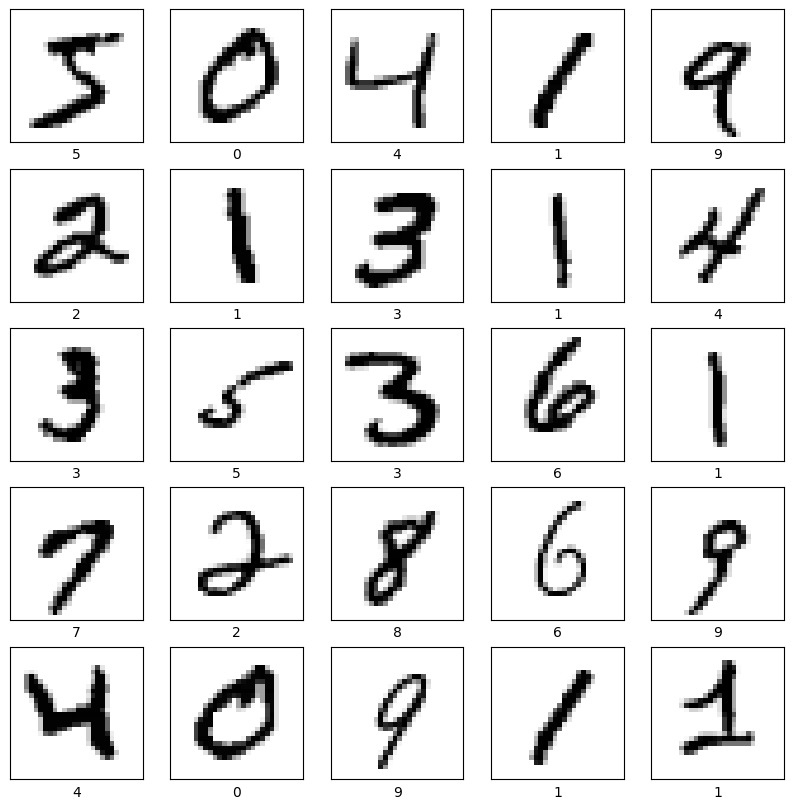

In [3]:
# Visualize sample images
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


## **Reshape and Normalize the Data:**

Reshape the data and normalize it to prepare it for training.

In [4]:
# Define image dimensions
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
IMAGE_CHANNELS = 1  # Grayscale images have one channel

# Reshape the data and add color channels
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

# Normalize the data
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

# Check the shape after normalization
print('x_train_normalized:', x_train_normalized.shape)
print('x_test_normalized:', x_test_normalized.shape)


x_train_normalized: (60000, 28, 28, 1)
x_test_normalized: (10000, 28, 28, 1)


## **Build the Model:**

Build a CNN model using TensorFlow's Sequential API.

In [5]:
# Build the CNN model
model = tf.keras.models.Sequential()

# Define input shape
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

# Add input layer
model.add(tf.keras.layers.Input(shape=input_shape))

# Add convolutional and pooling layers
model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

# Add another convolutional layer with 32 filters
model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=32,  
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Add flatten and dense layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

# Print model summary
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 20, 20, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 16)       │        12,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,914 (179.35 KB)

 Trainable params: 45,914 (179.35 KB)

 Non-trainable params: 0 (0.00 B)

## **Compile the Model:**

Compile the model using the Adam optimizer and sparse categorical crossentropy loss function.

In [6]:
# Compile the model
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)


## **Train the Model:**

Train the model on the training data and evaluate its performance on the test set.

In [7]:
# Train the model
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=20,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8681 - loss: 0.4027 - val_accuracy: 0.9773 - val_loss: 0.0742
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9806 - loss: 0.0664 - val_accuracy: 0.9869 - val_loss: 0.0436
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9849 - loss: 0.0525 - val_accuracy: 0.9899 - val_loss: 0.0307
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9880 - loss: 0.0397 - val_accuracy: 0.9891 - val_loss: 0.0351
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9895 - loss: 0.0334 - val_accuracy: 0.9890 - val_loss: 0.0346
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9921 - loss: 0.0275 - val_accuracy: 0.9887 - val_loss: 0.0410
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9928 - loss: 0.0226 - val_accuracy: 0.9908 - val_loss: 0.0303
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9933 -

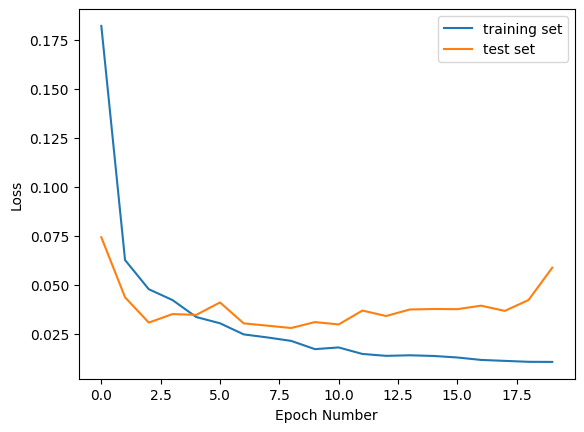

In [8]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

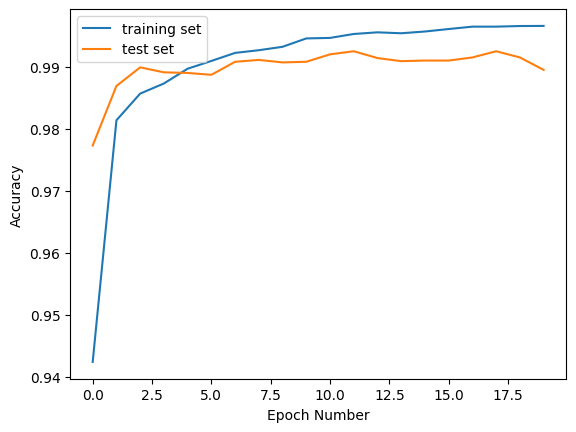

In [9]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## **Evaluate Model Accuracy:**

Evaluate the model's accuracy on both the training and test sets.

In [10]:
# Evaluate model accuracy
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9979 - loss: 0.0085
Training loss:  0.00807854626327753
Training accuracy:  0.9979166388511658
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9862 - loss: 0.0770
Validation loss:  0.05869463086128235
Validation accuracy:  0.9894999861717224


## **Save the Model:**

In [25]:
# Save the model architecture as JSON
model_architecture = model.to_json()
with open('Deployment/digits_recognition_cnn_architecture.json', 'w') as f:
    f.write(model_architecture)

# Save the model weights
model.save_weights('Deployment/digits_recognition_cnn_weights.weights.h5')

# Load the model architecture from JSON
with open('Deployment/digits_recognition_cnn_architecture.json', 'r') as f:
    loaded_model_architecture = f.read()

# Reconstruct the model from the architecture
loaded_model = tf.keras.models.model_from_json(loaded_model_architecture)

# Load the model weights
loaded_model.load_weights('Deployment/digits_recognition_cnn_weights.weights.h5')


## **Use the Model for Predictions:**

Use the trained model to make predictions on new handwritten digits.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


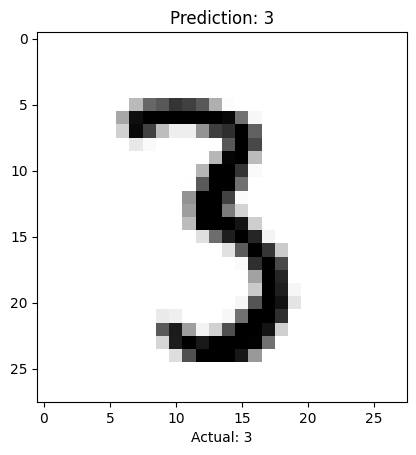

In [27]:
# Load the model architecture from JSON
with open('Deployment/digits_recognition_cnn_architecture.json', 'r') as f:
    loaded_model_architecture = f.read()

# Reconstruct the model from the architecture
loaded_model = tf.keras.models.model_from_json(loaded_model_architecture)

# Load the model weights
loaded_model.load_weights('Deployment/digits_recognition_cnn_weights.weights.h5')

# Make predictions using the loaded model
predictions = loaded_model.predict(x_test_normalized)

# Display a random test image and its prediction
random_index = np.random.randint(0, len(x_test_normalized))
plt.imshow(x_test[random_index], cmap=plt.cm.binary)
plt.xlabel('Actual: ' + str(y_test[random_index]))
plt.title('Prediction: ' + str(np.argmax(predictions[random_index])))
plt.show()


## **Conclusion**

In this notebook, I successfully built and trained a Convolutional Neural Network (CNN) model using TensorFlow to recognize handwritten digits from the MNIST dataset. The trained model achieved high accuracy on both the training and test sets. I visualized the model's training history using TensorBoard and saved the trained model to a HDF5 file for future use. Finally, I used the saved model to make predictions on new handwritten digits, demonstrating the model's ability to generalize to unseen data. Overall, this experiment provided valuable insights into the workings of CNNs and their practical applications in image recognition tasks.